In [2]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 
from pylab import *

In [3]:
meanprice = pd.read_csv("meanprice-numberofdays.csv")

meanprice.head()

,number of days,total
0,0,823.659760
1,1,719.816364
2,10,557.048289
3,100,700.417286
4,101,709.339975


In [4]:
meanprice.dtypes

number of days      int64
total             float64
dtype: object

In [5]:
# I convert strings to float - number of days should be float

meanprice['number of days'] = meanprice['number of days'].astype(float)

meanprice

,number of days,total
0,0.0,823.659760
1,1.0,719.816364
2,10.0,557.048289
3,100.0,700.417286
4,101.0,709.339975
5,102.0,752.000382
6,103.0,665.697742
7,104.0,692.875960
8,105.0,776.395196
9,106.0,681.095412


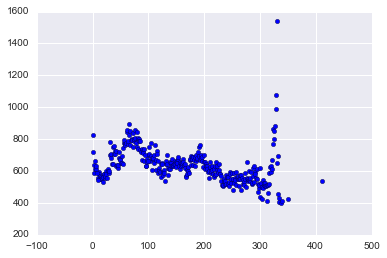

In [6]:
# Let's plot the number of days before booking vs. the price.
x = np.array(meanprice['number of days'])
y = np.array(meanprice['total'])

plt.scatter(x, y)

In [7]:
# Now I use the poly fit. I try with 4 degree.

p4 = np.poly1d(np.polyfit(x, y, 4))

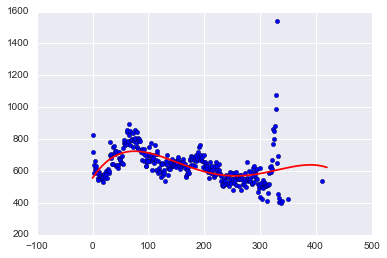

In [8]:
# I want to visualise this to see how good a fit it is.

xp = np.linspace(0, 420)

plt.scatter(x, y)
plt.plot(xp, p4(xp), c='r')
plt.show()

In [9]:
# I check the r_squared value to see how good a fit it is.

from sklearn.metrics import r2_score

r2 = r2_score(y, p4(x))

print r2

# The fit is pretty terrible.

0.257564655689


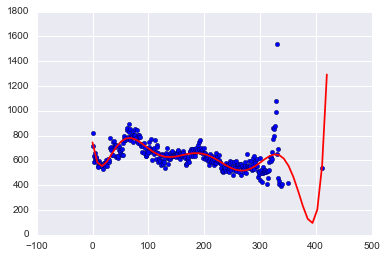

In [14]:
# I now want to increase the number of polynomials to 8.

p8 = np.poly1d(np.polyfit(x, y, 8))
xp = np.linspace(0, 420)

plt.scatter(x, y)
plt.plot(xp, p8(xp), c='r')
plt.savefig("eightdegreesplot.png")
plt.show()



# This looks a lot beter - but the function really goes out of its way to accommodate the outlier at 400.

In [14]:
# I check the R squared value again.

r2 = r2_score(y, p8(x))

print r2

0.41846433889


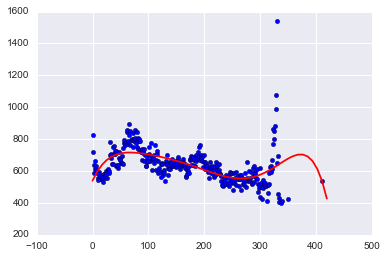

In [15]:
# I decrease the number to 6

p6 = np.poly1d(np.polyfit(x, y, 6))
xp = np.linspace(0, 420)

plt.scatter(x, y)
plt.plot(xp, p6(xp), c='r')
plt.show()

# This still looks pretty terible

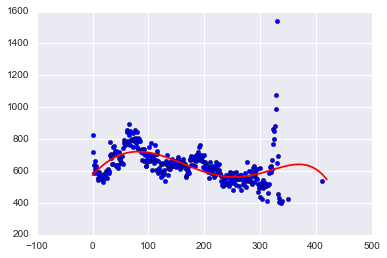

In [16]:
# Try 5
p5 = np.poly1d(np.polyfit(x, y, 5))
xp = np.linspace(0, 420)

plt.scatter(x, y)
plt.plot(xp, p5(xp), c='r')
plt.show()

# Pretty bad.

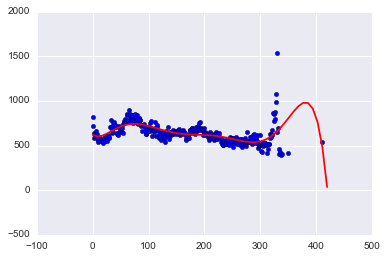

In [17]:
# Try 7

p7 = np.poly1d(np.polyfit(x, y, 7))
xp = np.linspace(0, 420)

plt.scatter(x, y)
plt.plot(xp, p7(xp), c='r')
plt.show()

# 7 doesn't look too bad. I want to check the R squared for it.

In [21]:
r2 = r2_score(y, p7(x))

print r2

# The value for 8 is significantly better.

0.315234334007


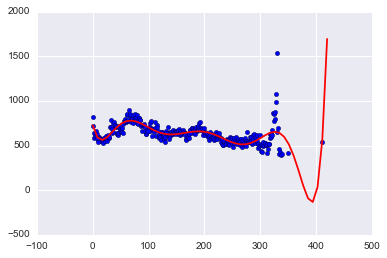

In [20]:
# Maybe try 9.

p9 = np.poly1d(np.polyfit(x, y, 9))
xp = np.linspace(0, 420)

plt.scatter(x, y)
plt.plot(xp, p9(xp), c='r')
plt.show()

In [ ]:
# 9 degrees doesn't look better than 8. I decide to stick to 8 degrees for the polynomial as I don't want to overfit.